In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# UTF-8 인코딩으로 파일 불러오기
df1 = pd.read_csv('연령_및_성별_인구_–_읍면동_연도_끝자리_0__5___시군구_그_외_연도__20240621182254.csv', encoding='utf-8')
df2 = pd.read_csv('시군구별_및_연령별_등록외국인_현황_20240621182441.csv', encoding='utf-8')
df3 = pd.read_csv('시도_시군구별_외국인과의_혼인_20240621182033.csv', encoding='utf-8')
df4 = pd.read_csv('연령_및_성별_다문화가구원__시도_20240621182348.csv', encoding='utf-8')
df5 = pd.read_csv('시군구_성_출산순위별_출생_20240621181932.csv', encoding='utf-8')

In [47]:
columns_to_keep = [col for col in df1.columns if col.isdigit() and len(col) == 4]
df1_cleaned = df1[columns_to_keep]

df1_cleaned = df1_cleaned.reset_index(drop=True).iloc[:2]
df1_end = df1_cleaned

df1_end = pd.DataFrame([df1_end.iloc[1].values], columns=df1_end.columns)
df1_end.index = ['총인구(명)']

df1_end.head()

,2015,2016,2017,2018,2019,2020,2021,2022
총인구(명),51069375,51269554,51422507,51629512,51779203,51829136,51738071,51692272


In [48]:
columns_to_keep = [col for col in df2.columns if col.isdigit() and len(col) == 4]
df2_cleaned = df2[columns_to_keep]

df2_cleaned.iloc[0] = df2_cleaned.iloc[0].replace('총계', '등록외국인(명)')

df2_cleaned = df2_cleaned.reset_index(drop=True).iloc[:2]
df2_cleaned = df2_cleaned.drop(columns=['2013', '2014'])
df2_end = df2_cleaned

df2_end = pd.DataFrame([df2_end.iloc[1].values], columns=df2_end.columns)
df2_end.index = ['등록외국인(명)']

print(df2_end)

             2015     2016     2017     2018     2019     2020     2021  \
등록외국인(명)  1143087  1161677  1171762  1246626  1271807  1145540  1093891   

             2022  
등록외국인(명)  1189585  


C:\Users\Admin\AppData\Local\Temp\ipykernel_632\4078854208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned.iloc[0] = df2_cleaned.iloc[0].replace('총계', '등록외국인(명)')


In [49]:
columns_to_keep = [col for col in df3.columns if col.isdigit() and len(col) == 4]
df3_cleaned = df3[columns_to_keep]

df3_cleaned.iloc[0] = df3_cleaned.iloc[0].replace('남편-전체혼인건수', '국제결혼건수')

df3_cleaned = df3_cleaned.reset_index(drop=True).iloc[:2]
df3_cleaned = df3_cleaned.drop(columns=['2013', '2014', '2023'])
df3_end = df3_cleaned

df3_end = pd.DataFrame([df3_end.iloc[1].values], columns=df3_end.columns)
df3_end.index = ['국제결혼건수']

print(df3_end)

          2015    2016    2017    2018    2019    2020    2021    2022
국제결혼건수  302828  281635  264455  257622  239159  213502  192507  191690


C:\Users\Admin\AppData\Local\Temp\ipykernel_632\656977125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_cleaned.iloc[0] = df3_cleaned.iloc[0].replace('남편-전체혼인건수', '국제결혼건수')


In [50]:
columns_to_keep = ['2016', '2016.9', '2017', '2017.9', '2018', '2018.9', '2019', '2019.9', '2020', '2020.9', '2021', '2021.9', '2022', '2022.9']
df4_cleaned = df4[columns_to_keep]

# 데이터프레임 통합
years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']
data = {
    '다문화가구원(명)': [df4_cleaned[year][1] for year in years],
    '외국인(결혼이민자)': [df4_cleaned[f"{year}.9"][1] for year in years]
}

# 새로운 데이터프레임 생성 및 전치
df4_end = pd.DataFrame(data, index=years).transpose()

df4_end.head()

,2016,2017,2018,2019,2020,2021,2022
다문화가구원(명),963174,963801,1008520,1062423,1093228,1119267,1151004
외국인(결혼이민자),158620,159958,165919,173085,173104,174122,175365


In [51]:
columns_to_keep = [col for col in df5.columns if col.isdigit() and len(col) == 4]
df5_cleaned = df5[columns_to_keep]
df5_cleaned.iloc[0] = df5_cleaned.iloc[0].replace('계 (명)', '출생아')

df5_cleaned = df5_cleaned.reset_index(drop=True).iloc[:2]
df5_cleaned = df5_cleaned.drop(columns=['2013', '2014'])
df5_end = df5_cleaned

df5_end = pd.DataFrame([df5_end.iloc[1].values], columns=df5_end.columns)
df5_end.index = ['출생아']

df5_end.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_632\649923358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_cleaned.iloc[0] = df5_cleaned.iloc[0].replace('계 (명)', '출생아')


,2015,2016,2017,2018,2019,2020,2021,2022
출생아,438420,406243,357771,326822,302676,272337,260562,249186


In [52]:
# 데이터프레임 1
df1 = pd.DataFrame({
    '총인구(명)': [51069375, 51269554, 51422507, 51629512, 51779203, 51829136, 51738071, 51692272]
}, index=['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']).T

# 데이터프레임 2
df2 = pd.DataFrame({
    '등록외국인(명)': [1143087, 1161677, 1171762, 1246626, 1271807, 1145540, 1093891, 1189585]
}, index=['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']).T

# 데이터프레임 3
df3 = pd.DataFrame({
    '국제결혼건수': [302828, 281635, 264455, 257622, 239159, 213502, 192507, 191690]
}, index=['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']).T

# 데이터프레임 4
df4 = pd.DataFrame({
    '다문화가구원(명)': [None, 963174, 963801, 1008520, 1062423, 1093228, 1119267, 1151004],
    '외국인(결혼이민자)': [None, 158620, 159958, 165919, 173085, 173104, 174122, 175365]
}, index=['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']).T

# 데이터프레임 5
df5 = pd.DataFrame({
    '출생아': [438420, 406243, 357771, 326822, 302676, 272337, 260562, 249186]
}, index=['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']).T

# 데이터프레임 병합
df_combined = pd.concat([df1, df2, df3, df4, df5])

df_combined.head()

,2015,2016,2017,2018,2019,2020,2021,2022
총인구(명),51069375.0,51269554.0,51422507.0,51629512.0,51779203.0,51829136.0,51738071.0,51692272.0
등록외국인(명),1143087.0,1161677.0,1171762.0,1246626.0,1271807.0,1145540.0,1093891.0,1189585.0
국제결혼건수,302828.0,281635.0,264455.0,257622.0,239159.0,213502.0,192507.0,191690.0
다문화가구원(명),NaN,963174.0,963801.0,1008520.0,1062423.0,1093228.0,1119267.0,1151004.0
외국인(결혼이민자),NaN,158620.0,159958.0,165919.0,173085.0,173104.0,174122.0,175365.0


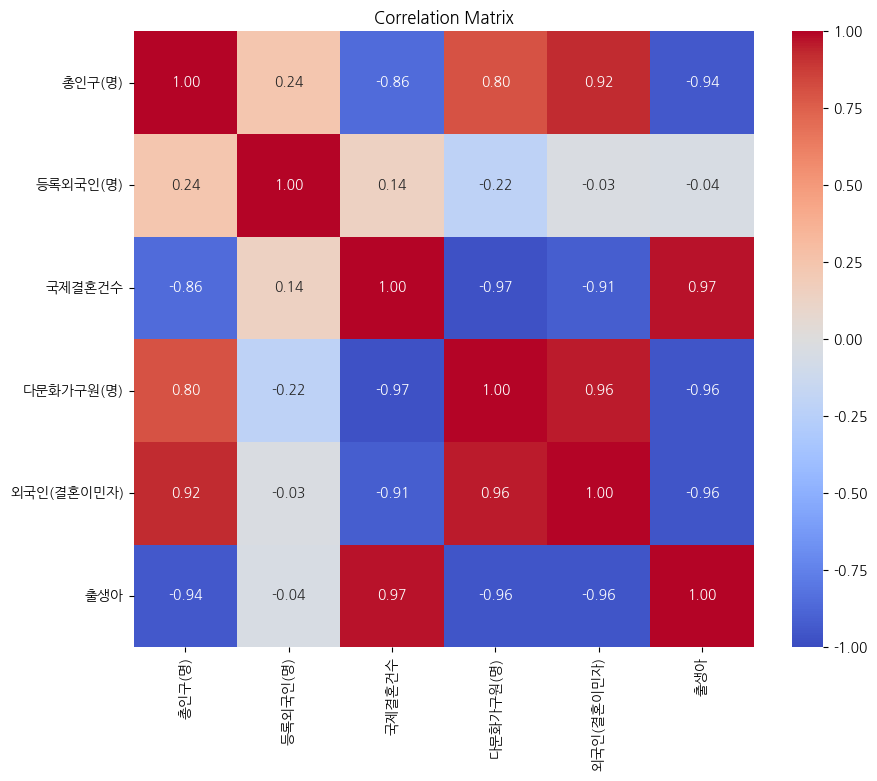

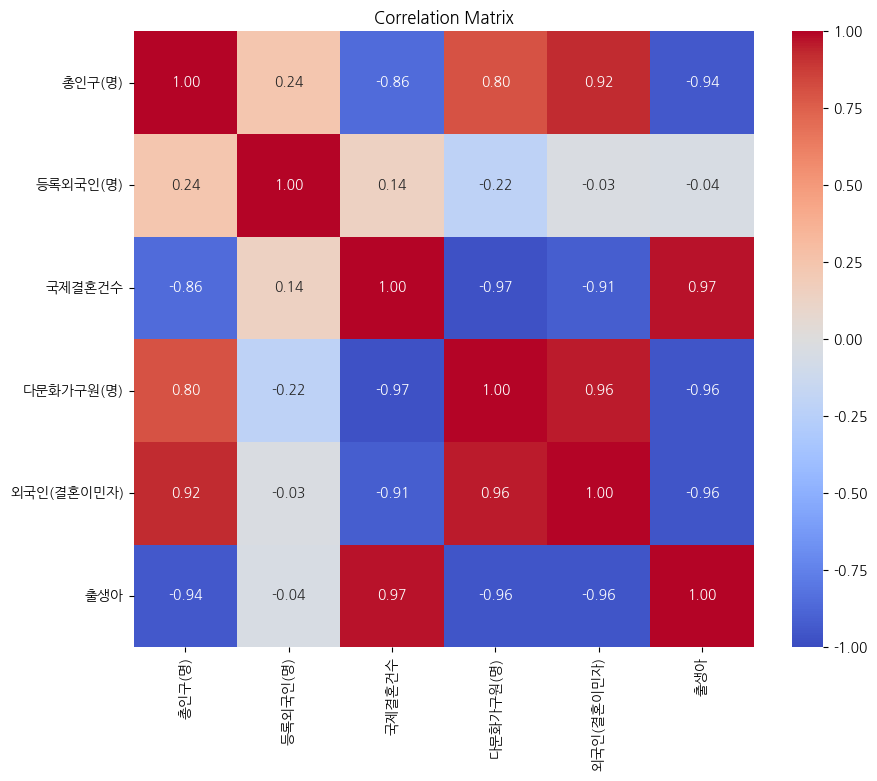

In [53]:
plt.rcParams['font.family'] = 'NanumGothic'

correlation_matrix = df_combined.T.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

correlation_matrix = df_combined.T.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# ----------------------------------------------------------

In [ ]:
# 결측치 처리 (각 열의 평균값으로 결측치 채우기)
df.fillna(df.mean(), inplace=True)
# 결측치가 잘 처리되었는지 확인
print(df.isnull().sum())

### 확인해야 할 데이터들

In [ ]:
print(df4.head())
print(df5.head())
print(df6.head())